# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

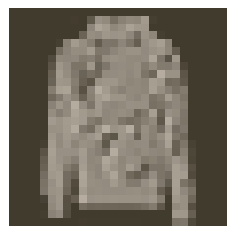

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODONE: Define your network architecture here
from torch import nn
from collections import OrderedDict

input_size = 784
hidden_sizes = [256, 128, 64, 16]
output_size = 10


model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(hidden_sizes[2], hidden_sizes[3])),
                      ('relu4', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[3], output_size)),
                      ('softmax', nn.LogSoftmax(dim=1))]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=16, bias=True)
  (relu4): ReLU()
  (output): Linear(in_features=16, out_features=10, bias=True)
  (softmax): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODONE: Create the network, define the criterion and optimizer
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [5]:
# TODONE: Train the network here

def trainner(epochs=5):

    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        else: # nobreak
            print(f"Epoch {e+1} Training loss: {running_loss/len(trainloader)}")
            
#     return model
        
trainner()

Epoch 1 Training loss: 2.2998601134652015
Epoch 2 Training loss: 2.1975333512719
Epoch 3 Training loss: 1.947188483372426
Epoch 4 Training loss: 1.4941783809204345
Epoch 5 Training loss: 0.9716138426047652


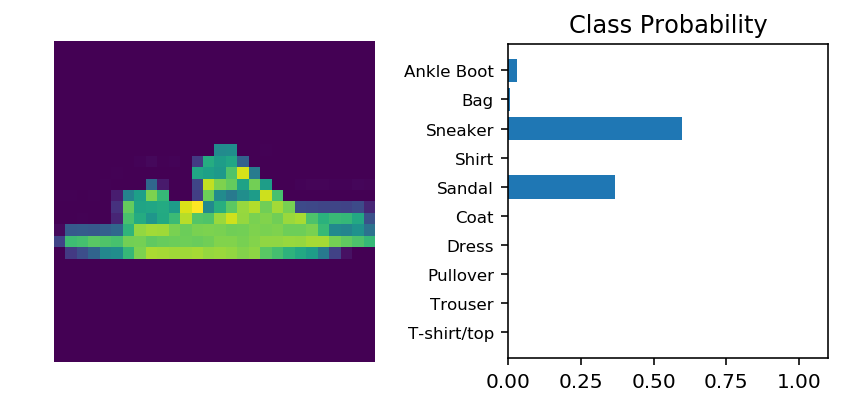

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import torch.nn.functional as F

# Test out your network!

def tester():
    dataiter = iter(testloader)
    images, labels = dataiter.next()
    img = images[0]
    # Convert 2D image to 1D vector
    img = img.resize_(1, 784)

    # TODO: Calculate the class probabilities (softmax) for img
    with torch.no_grad():
        logits = model.forward(img)

    ps = F.softmax(logits, dim=1)

    # Plot the image and probabilities
    helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
    
tester()

In [7]:
# Train further
trainner(3)

Epoch 1 Training loss: 0.7752937186501427
Epoch 2 Training loss: 0.684607970149024
Epoch 3 Training loss: 0.622863053354119


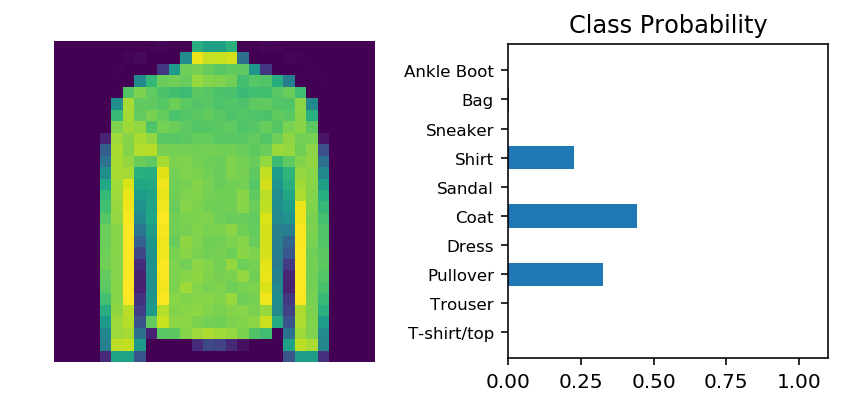

In [8]:
# Test again
tester()

In [9]:
# Trying to train much further to check for diminishing returns
trainner(25)

Epoch 1 Training loss: 0.575841495254909
Epoch 2 Training loss: 0.5415179790464292
Epoch 3 Training loss: 0.5161065973325579
Epoch 4 Training loss: 0.4957640948199006
Epoch 5 Training loss: 0.4790987553023326
Epoch 6 Training loss: 0.465858537298657
Epoch 7 Training loss: 0.45421894641319066
Epoch 8 Training loss: 0.4440289544684292
Epoch 9 Training loss: 0.43506351353199496
Epoch 10 Training loss: 0.426483792759208
Epoch 11 Training loss: 0.4198009406230343
Epoch 12 Training loss: 0.4119448346465127
Epoch 13 Training loss: 0.4059576887820067
Epoch 14 Training loss: 0.39869622244382463
Epoch 15 Training loss: 0.392877365829848
Epoch 16 Training loss: 0.38577344524326607
Epoch 17 Training loss: 0.38093634556605616
Epoch 18 Training loss: 0.37588242717833914
Epoch 19 Training loss: 0.37020629560197593
Epoch 20 Training loss: 0.3653906350101489
Epoch 21 Training loss: 0.3600396906802141
Epoch 22 Training loss: 0.35561397114097437
Epoch 23 Training loss: 0.35049046445757087
Epoch 24 Traini

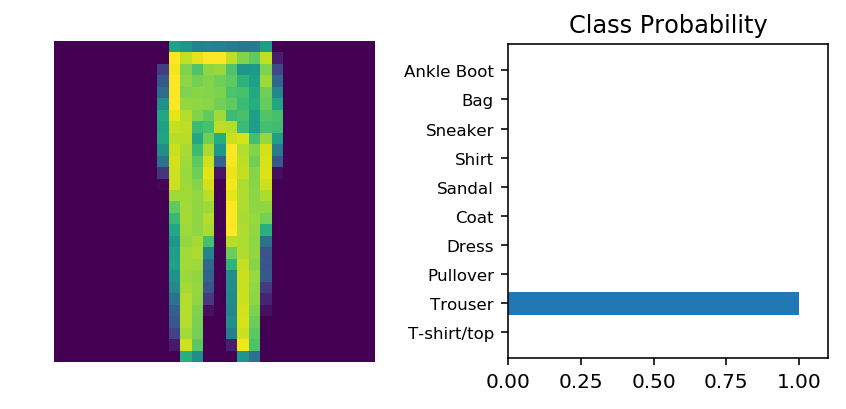

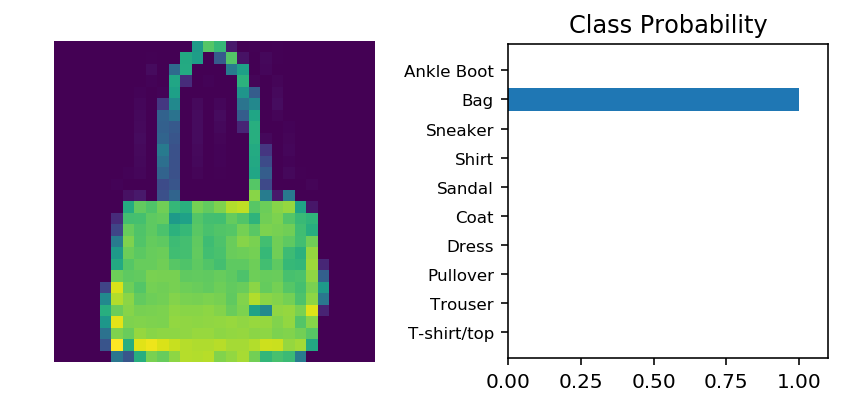

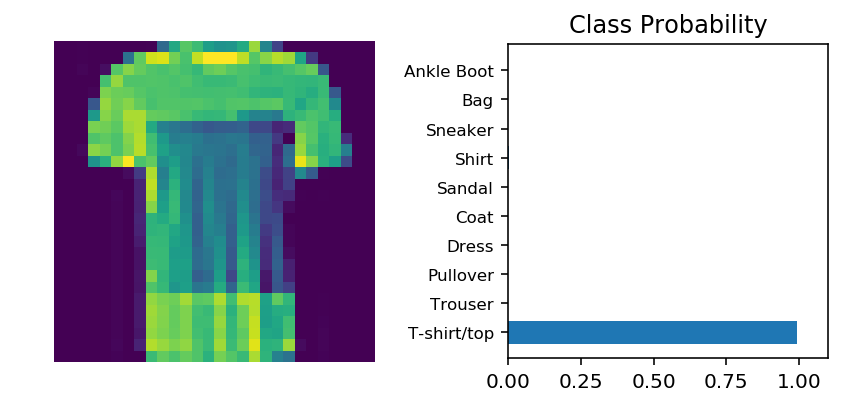

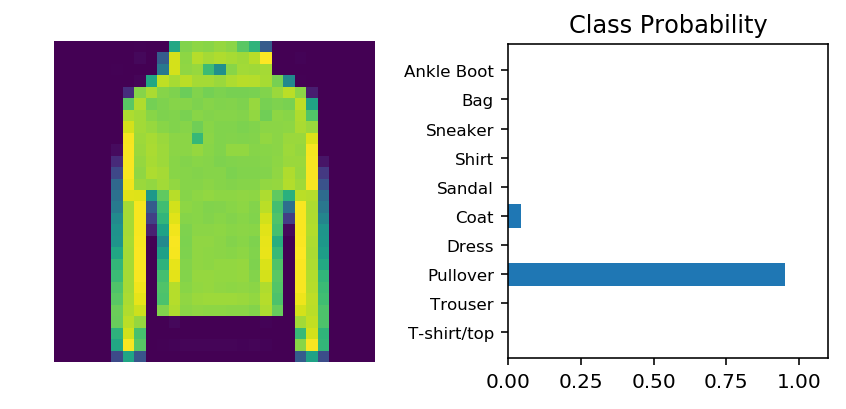

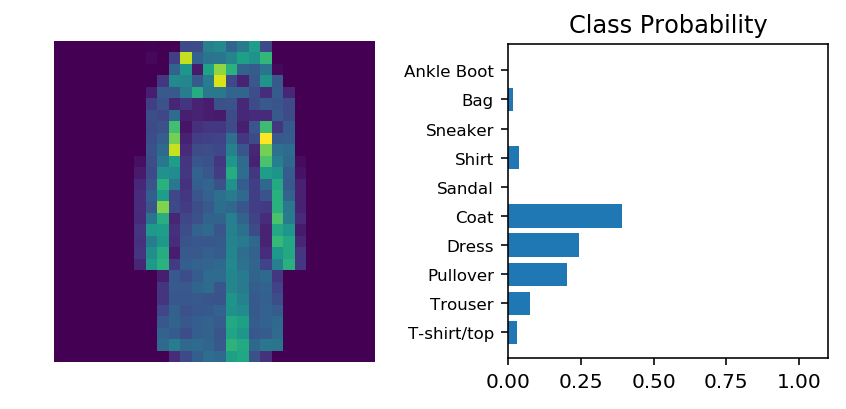

In [10]:
# Test again again
for x in range(5):
    tester()